# FCIDECOMP software usage examples

This notebooks presents examples of the different usage patterns of the FCIDECOMP software.

## Introduction

The FCIDECOMP software enable users to read NetCDF files compressed with the JPEG-LS compression filter. Once installed, it can be used with:

- Python libraries, such as ``xarray`` adn ``netcdf4``
- netCDF-C based CLI tools, such as ``nccopy``
- The EUMETSAT Data Tailor, through the ``epct_plugin_mtg`` plugin
- Some netCDF-Java based applications, such as Panoply

In the following sections, usage examples of the first three points above are reported. For usage with NetCDF-Java based applications, see the README file.

In order to run the following examples, ensure that the ``HDF5_PLUGIN_PATH`` is set to the path of the directory containing the FCIDECOMP software libraries, and that the ``EPCT_TEST_DATA_DIR`` is set as described in the ``README`` accompanying this notebook.

## General imports and setting

In the following, general purpose Python libraries and the ``fcidecomp`` Python module are loaded

**NOTE**: if the FCIDECOMP software has been correctly installed and the ``HDF5_PLUGIN_PATH`` has been set to the right location, no error should be raised

In [1]:
import os

fcidecomp filter already loaded, skip it.


The following line is needed to show plots in the notebook

In [2]:
%matplotlib inline

Let's assign to the `TEST_FILE_DIR` variable the path to directory containing the test JPEG-LS compressed NetCDF file

In [9]:
TEST_FILE_DIR = os.path.join(os.environ["EPCT_TEST_DATA_DIR"], "MTG", "MTGFCIL1")
COMP_FILE = os.path.join(
    TEST_FILE_DIR,
    "W_XX-EUMETSAT-Darmstadt_IMG+SAT_MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY--"
    "DIS-NC4E_C_EUMT_20200405120015_GTT_DEV_20200405115500_20200405115515_N_JLS_T_0072_0021.nc"
)

## Usage with Python

### ``xarray``

Let's import both the ``xarray`` and ``fcidecomp`` libraries, which loads the FCIDECOMP decompression filter.

In [15]:
import xarray as xr

import fcidecomp

Let's open an JPEG-LS compressed file, loading a specific group of the netCDF file as an ``xarray`` dataset 

In [16]:
ds = xr.open_dataset(COMP_FILE, group='data/ir_105/measured')
ds

<xarray.Dataset>
Dimensions:                                           (x: 5568, y: 139)
Coordinates:
  * x                                                 (x) float32 0.1556 ... ...
  * y                                                 (y) float32 2.795e-05 ....
Data variables: (12/14)
    start_position_row                                float32 ...
    start_position_column                             float32 ...
    end_position_row                                  float32 ...
    end_position_column                               float32 ...
    effective_radiance                                (y, x) float32 ...
    pixel_quality                                     (y, x) float32 ...
    ...                                                ...
    radiance_to_bt_conversion_constant_c2             float32 ...
    radiance_to_bt_conversion_coefficient_a           float32 ...
    radiance_to_bt_conversion_coefficient_b           float32 ...
    radiance_to_bt_conversion_coefficient_wavenumber  float32 ...
    channel_effective_solar_irradiance                float32 ...
    index_map                                         (y, x) float32 ...

Now let's plot the ``effective_radiace`` variable, showing that the file has been correctly uncompressed.

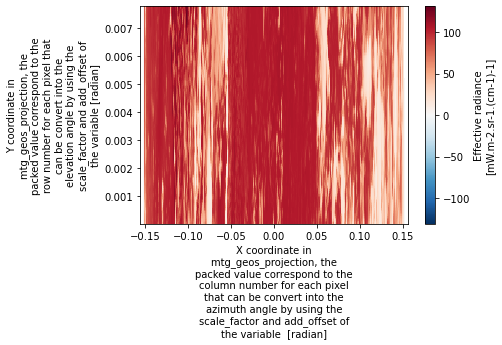

In [17]:
ds.effective_radiance.plot()

### ``netCDF4``

Let's import both the ``matplotlib``, ``netCDF4`` and ``fcidecomp`` libraries, which loads the FCIDECOMP decompression filter.

In [28]:
import matplotlib.pyplot as plt
import netCDF4 as nc

import fcidecomp

Now open the JPEG-LS compressed netCDF file and load it into the ``ds`` variable

In [20]:
ds = nc.Dataset(COMP_FILE, "r")

Let's extract values of the band ``'data/ir_105/measured/effective_radiance`` and assign the resulting masked array to the ``band`` variable, and let's print its content

In [30]:
band = ds['data/ir_105/measured/effective_radiance'][:]
band

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=65535,
  dtype=float32)

## Usage with netCDF-C based CLI tools

### ``nccopy``

The following line is actually run in the shell

In [36]:
!nccopy -F none {COMP_FILE} {os.path.join(TEST_FILE_DIR, "uncompressed_nccopy.nc")}

Let's open the output of the previous shell command, which uncompressed in a new file the JPEG-LS compressed test file

In [37]:
ds = xr.open_dataset(os.path.join(TEST_FILE_DIR, "uncompressed_nccopy.nc"), group='data/ir_105/measured')
ds

<xarray.Dataset>
Dimensions:                                           (x: 5568, y: 139)
Coordinates:
  * x                                                 (x) float32 0.1556 ... ...
  * y                                                 (y) float32 2.795e-05 ....
Data variables: (12/14)
    start_position_row                                float32 ...
    start_position_column                             float32 ...
    end_position_row                                  float32 ...
    end_position_column                               float32 ...
    effective_radiance                                (y, x) float32 ...
    pixel_quality                                     (y, x) float32 ...
    ...                                                ...
    radiance_to_bt_conversion_constant_c2             float32 ...
    radiance_to_bt_conversion_coefficient_a           float32 ...
    radiance_to_bt_conversion_coefficient_b           float32 ...
    radiance_to_bt_conversion_coefficient_wavenumber  float32 ...
    channel_effective_solar_irradiance                float32 ...
    index_map                                         (y, x) float32 ...

Now let's plot the ``effective_radiace`` variable, showing that the file has been correctly uncompressed

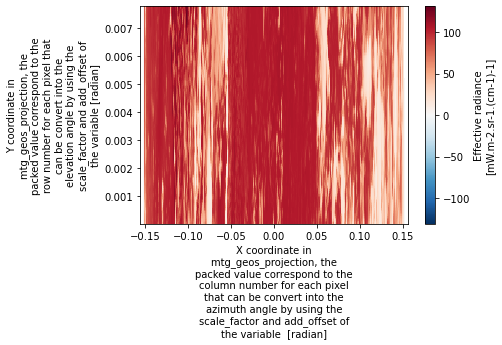

In [38]:
ds.effective_radiance.plot()

## Usage with the EUMETSAT Data Tailor